# EDA

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import setting

from src.common import util
from src import viz

In [4]:
sns.set_theme(style="whitegrid")

In [5]:
df_train, df_test = util.load_data()

## describe

In [6]:
df_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [7]:
df_test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,250261.031215,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174
std,144128.894365,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333
min,0.000000,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500
25%,125538.250000,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210
50%,250389.500000,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124
75%,375240.250000,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664
max,499990.000000,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679


## correlation

<AxesSubplot:>

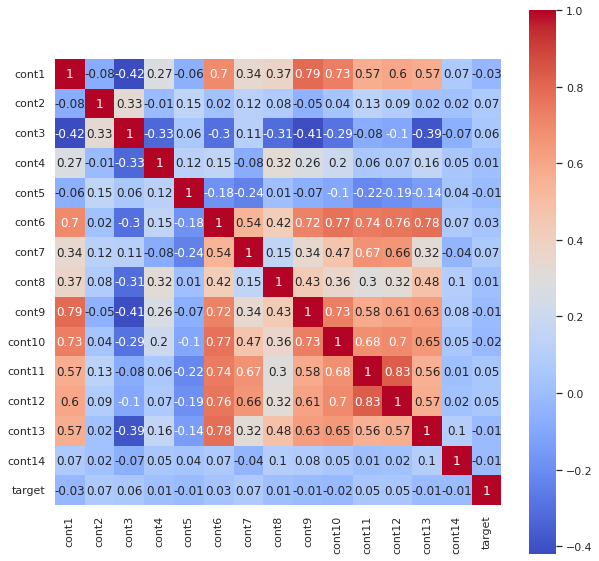

In [8]:
plt.figure(figsize=(10, 10))
(
    df_train.drop(columns="id")
    .corr()
    .round(2)
    .pipe(sns.heatmap, annot=True, cmap="coolwarm", square=True)
)

<Figure size 720x720 with 0 Axes>

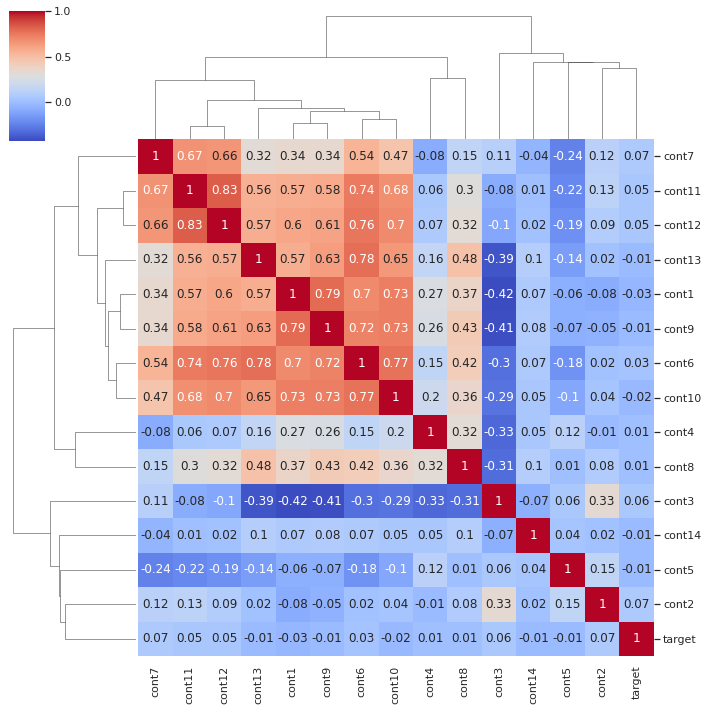

In [9]:
plt.figure(figsize=(10, 10))
(
    df_train.drop(columns="id")
    .corr()
    .round(2)
    .pipe(sns.clustermap, annot=True, cmap="coolwarm")
)

## target

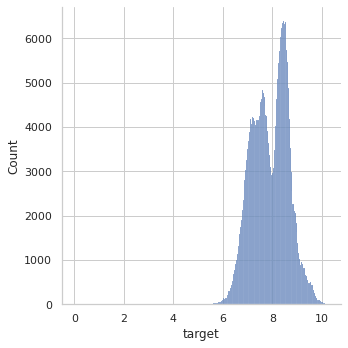

In [10]:
sns.displot(
    data=df_train,
    x="target",
    kind="hist",
)

## cont10

- train, test で似たような分布をしている

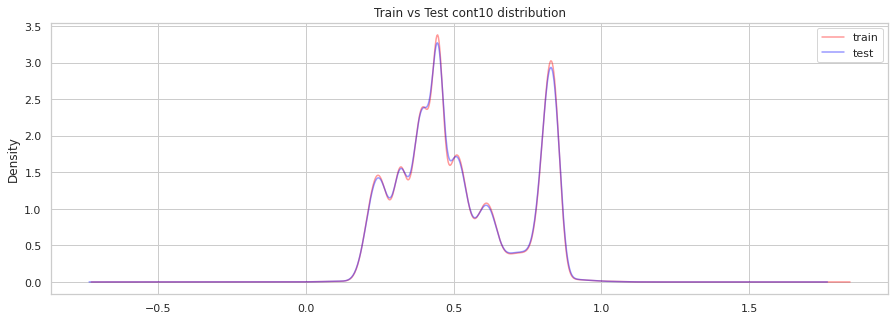

In [11]:
viz.plot_desnity_train_test_overlapping(
    df_train,
    df_test,
    "cont10"
)

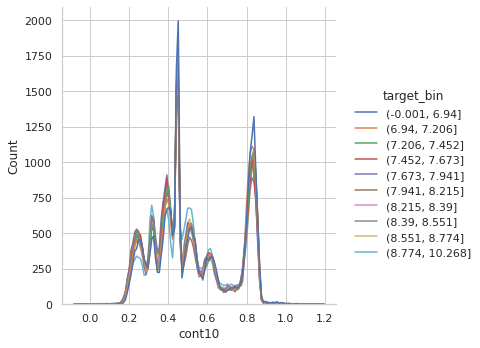

In [12]:
(
    df_train.assign(target_bin=pd.qcut(df_train["target"], 10)).pipe(
        (sns.displot, "data"),
        x="cont10",
        hue="target_bin",
        fill=False,
        element="poly",
    )
)

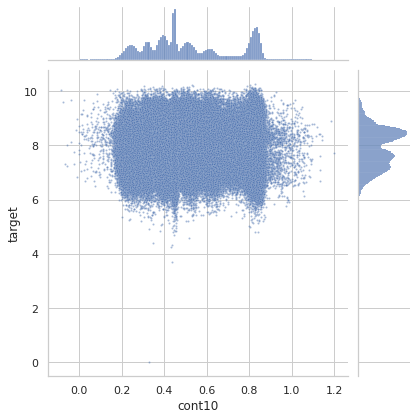

In [13]:
sns.jointplot(
    data = df_train,
    x="cont10",
    y="target",
    alpha=.5,
    s=4
);

## cont13

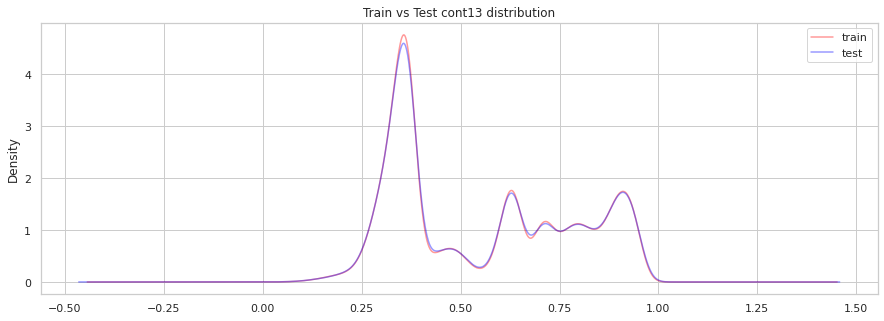

In [14]:
viz.plot_desnity_train_test_overlapping(
    df_train,
    df_test,
    "cont13"
)

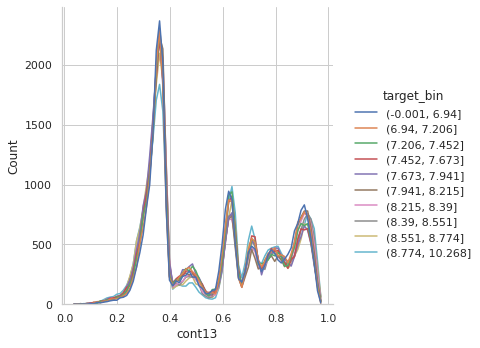

In [15]:
(
    df_train.assign(target_bin=pd.qcut(df_train["target"], 10)).pipe(
        (sns.displot, "data"),
        x="cont13",
        hue="target_bin",
        fill=False,
        element="poly",
    )
)

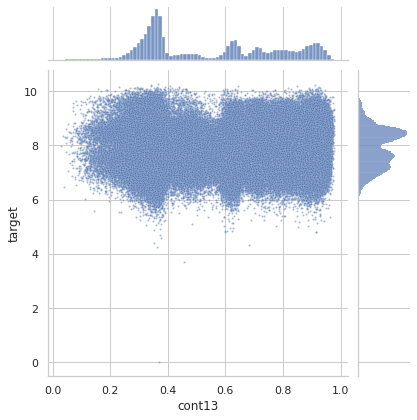

In [16]:
sns.jointplot(
    data = df_train,
    x="cont13",
    y="target",
    alpha=.5,
    s=4
);

## cont10 x cont13

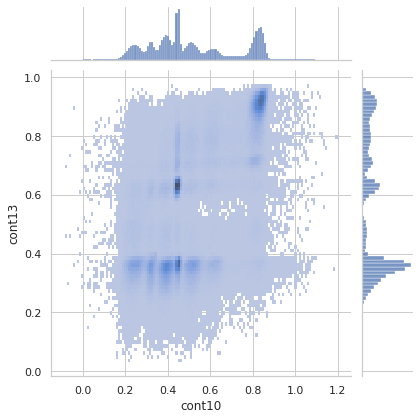

In [17]:
df_train.pipe(
    (sns.jointplot, "data"),
    x="cont10",
    y="cont13",
    kind="hist"
);

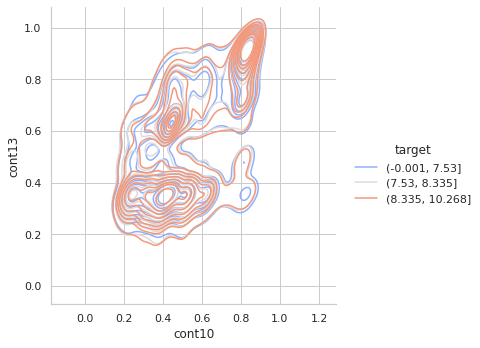

In [23]:
g = df_train.assign(target= pd.qcut(df_train["target"], 3)).pipe(
    (sns.displot, "data"),
    x="cont10",
    y="cont13",
    hue="target",
    kind="kde",
    palette="coolwarm",
);
# sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

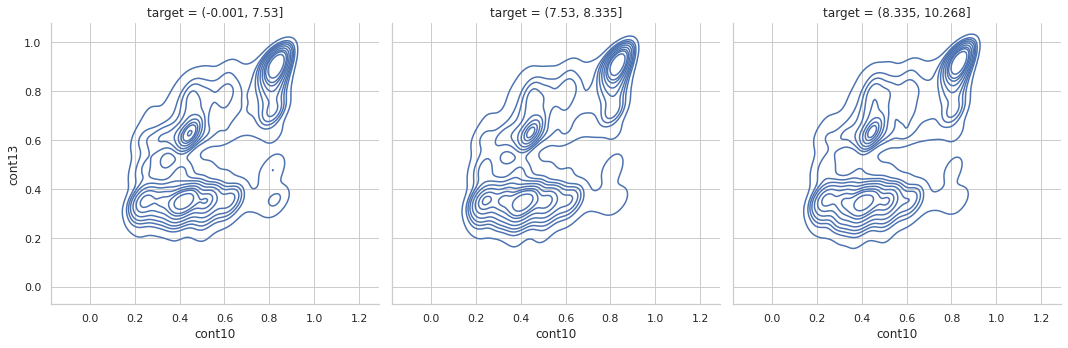

In [21]:
sns.displot(
    data=df_train.assign(target=pd.qcut(df_train["target"], 3)),
    x="cont10",
    y="cont13",
    col="target",
    kind="kde"
)

In [24]:
from sklearn.mixture import BayesianGaussianMixture

In [29]:
bgm = BayesianGaussianMixture(
    n_components=4,
    max_iter=150

)
df_gbm = pd.DataFrame(
bgm.fit_predict(df_train[["cont10", "cont13"]]),
columns=["bgm"]
)

In [31]:
df_gbm = df_gbm.assign(
    **df_train[["cont10", "cont13"]]
)
df_gbm.head()

,bgm,cont10,cont13
0,2,0.779418,0.878733
1,3,0.432632,0.369957
2,2,0.823312,0.882938
3,1,0.580843,0.914281
4,2,0.863427,0.935918


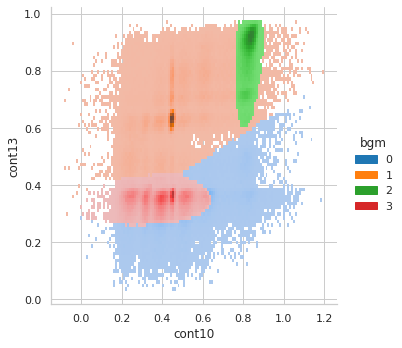

In [33]:
sns.displot(
    data=df_gbm,
    x="cont10",
    y="cont13",
    hue="bgm",
    palette="tab10"
)

In [34]:
bgm.predict_proba(df_train[["cont10", "cont13"]])

array([[1.83649794e-10, 2.25053599e-01, 7.74946401e-01, 1.00214265e-60],
       [5.83515983e-02, 5.10991562e-03, 1.97406397e-67, 9.36538486e-01],
       [2.28844300e-11, 1.14182071e-02, 9.88581793e-01, 3.02276701e-63],
       ...,
       [9.99954293e-01, 3.03417171e-05, 1.43819811e-41, 1.53648776e-05],
       [9.99999564e-01, 4.36301661e-07, 1.00780896e-24, 1.29239221e-14],
       [1.53837489e-07, 9.99999846e-01, 3.52871470e-16, 1.04093435e-36]])